In [1]:
from inference import run_bayesian_inference

import matplotlib.pyplot as plt

/home/roi/anaconda3/envs/satellite/lib/python3.13/site-packages/numpy/_core/getlimits.py:552: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)
/home/roi/anaconda3/envs/satellite/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
mcmc = run_bayesian_inference()

--- 1. Generating Ground Truth Data ---
Precomputing ephemeris data...
Data generation complete.

--- 2. Running Bayesian Inference with NumPyro ---


sample: 100%|██████████| 3000/3000 [00:18<00:00, 158.89it/s, 559 steps of size 4.06e-05. acc. prob=0.95]



--- 3. Inference Results ---


In [3]:
# Get samples from the posterior
mcmc_samples = mcmc.get_samples()
mcmc.print_summary()


                mean       std    median      5.0%     95.0%     n_eff     r_hat
   logBeta     -0.69      0.00     -0.69     -0.69     -0.69    971.34      1.00
    logGam      4.61      0.00      4.61      4.61      4.61   1874.81      1.00
     logKd     -5.30      0.00     -5.30     -5.30     -5.30   1278.23      1.00
     logKp     -7.60      0.00     -7.60     -7.60     -7.60   1339.28      1.00
  logSigma    -11.49      0.01    -11.49    -11.51    -11.47    249.11      1.00

Number of divergences: 0


In [4]:
mcmc_samples["gamma"].mean(), mcmc_samples["gamma"].std()

(Array(100.00000383, dtype=float64), Array(1.70772628e-05, dtype=float64))

In [5]:
mcmc_samples["Kd"].mean(), mcmc_samples["Kd"].std()

(Array(0.00500001, dtype=float64), Array(2.03827318e-08, dtype=float64))

In [6]:
mcmc_samples["Kp"].mean(), mcmc_samples["Kp"].std()

(Array(0.0005, dtype=float64), Array(3.41566871e-10, dtype=float64))

In [7]:
mcmc_samples["beta"].mean(), mcmc_samples["beta"].std()

(Array(0.4999981, dtype=float64), Array(2.67612066e-06, dtype=float64))

In [8]:
mcmc_samples["sigma"].mean(), mcmc_samples["sigma"].std()

(Array(1.019861e-05, dtype=float64), Array(1.0843308e-07, dtype=float64))

In [9]:
import arviz as az

inf_data = az.from_numpyro(mcmc)

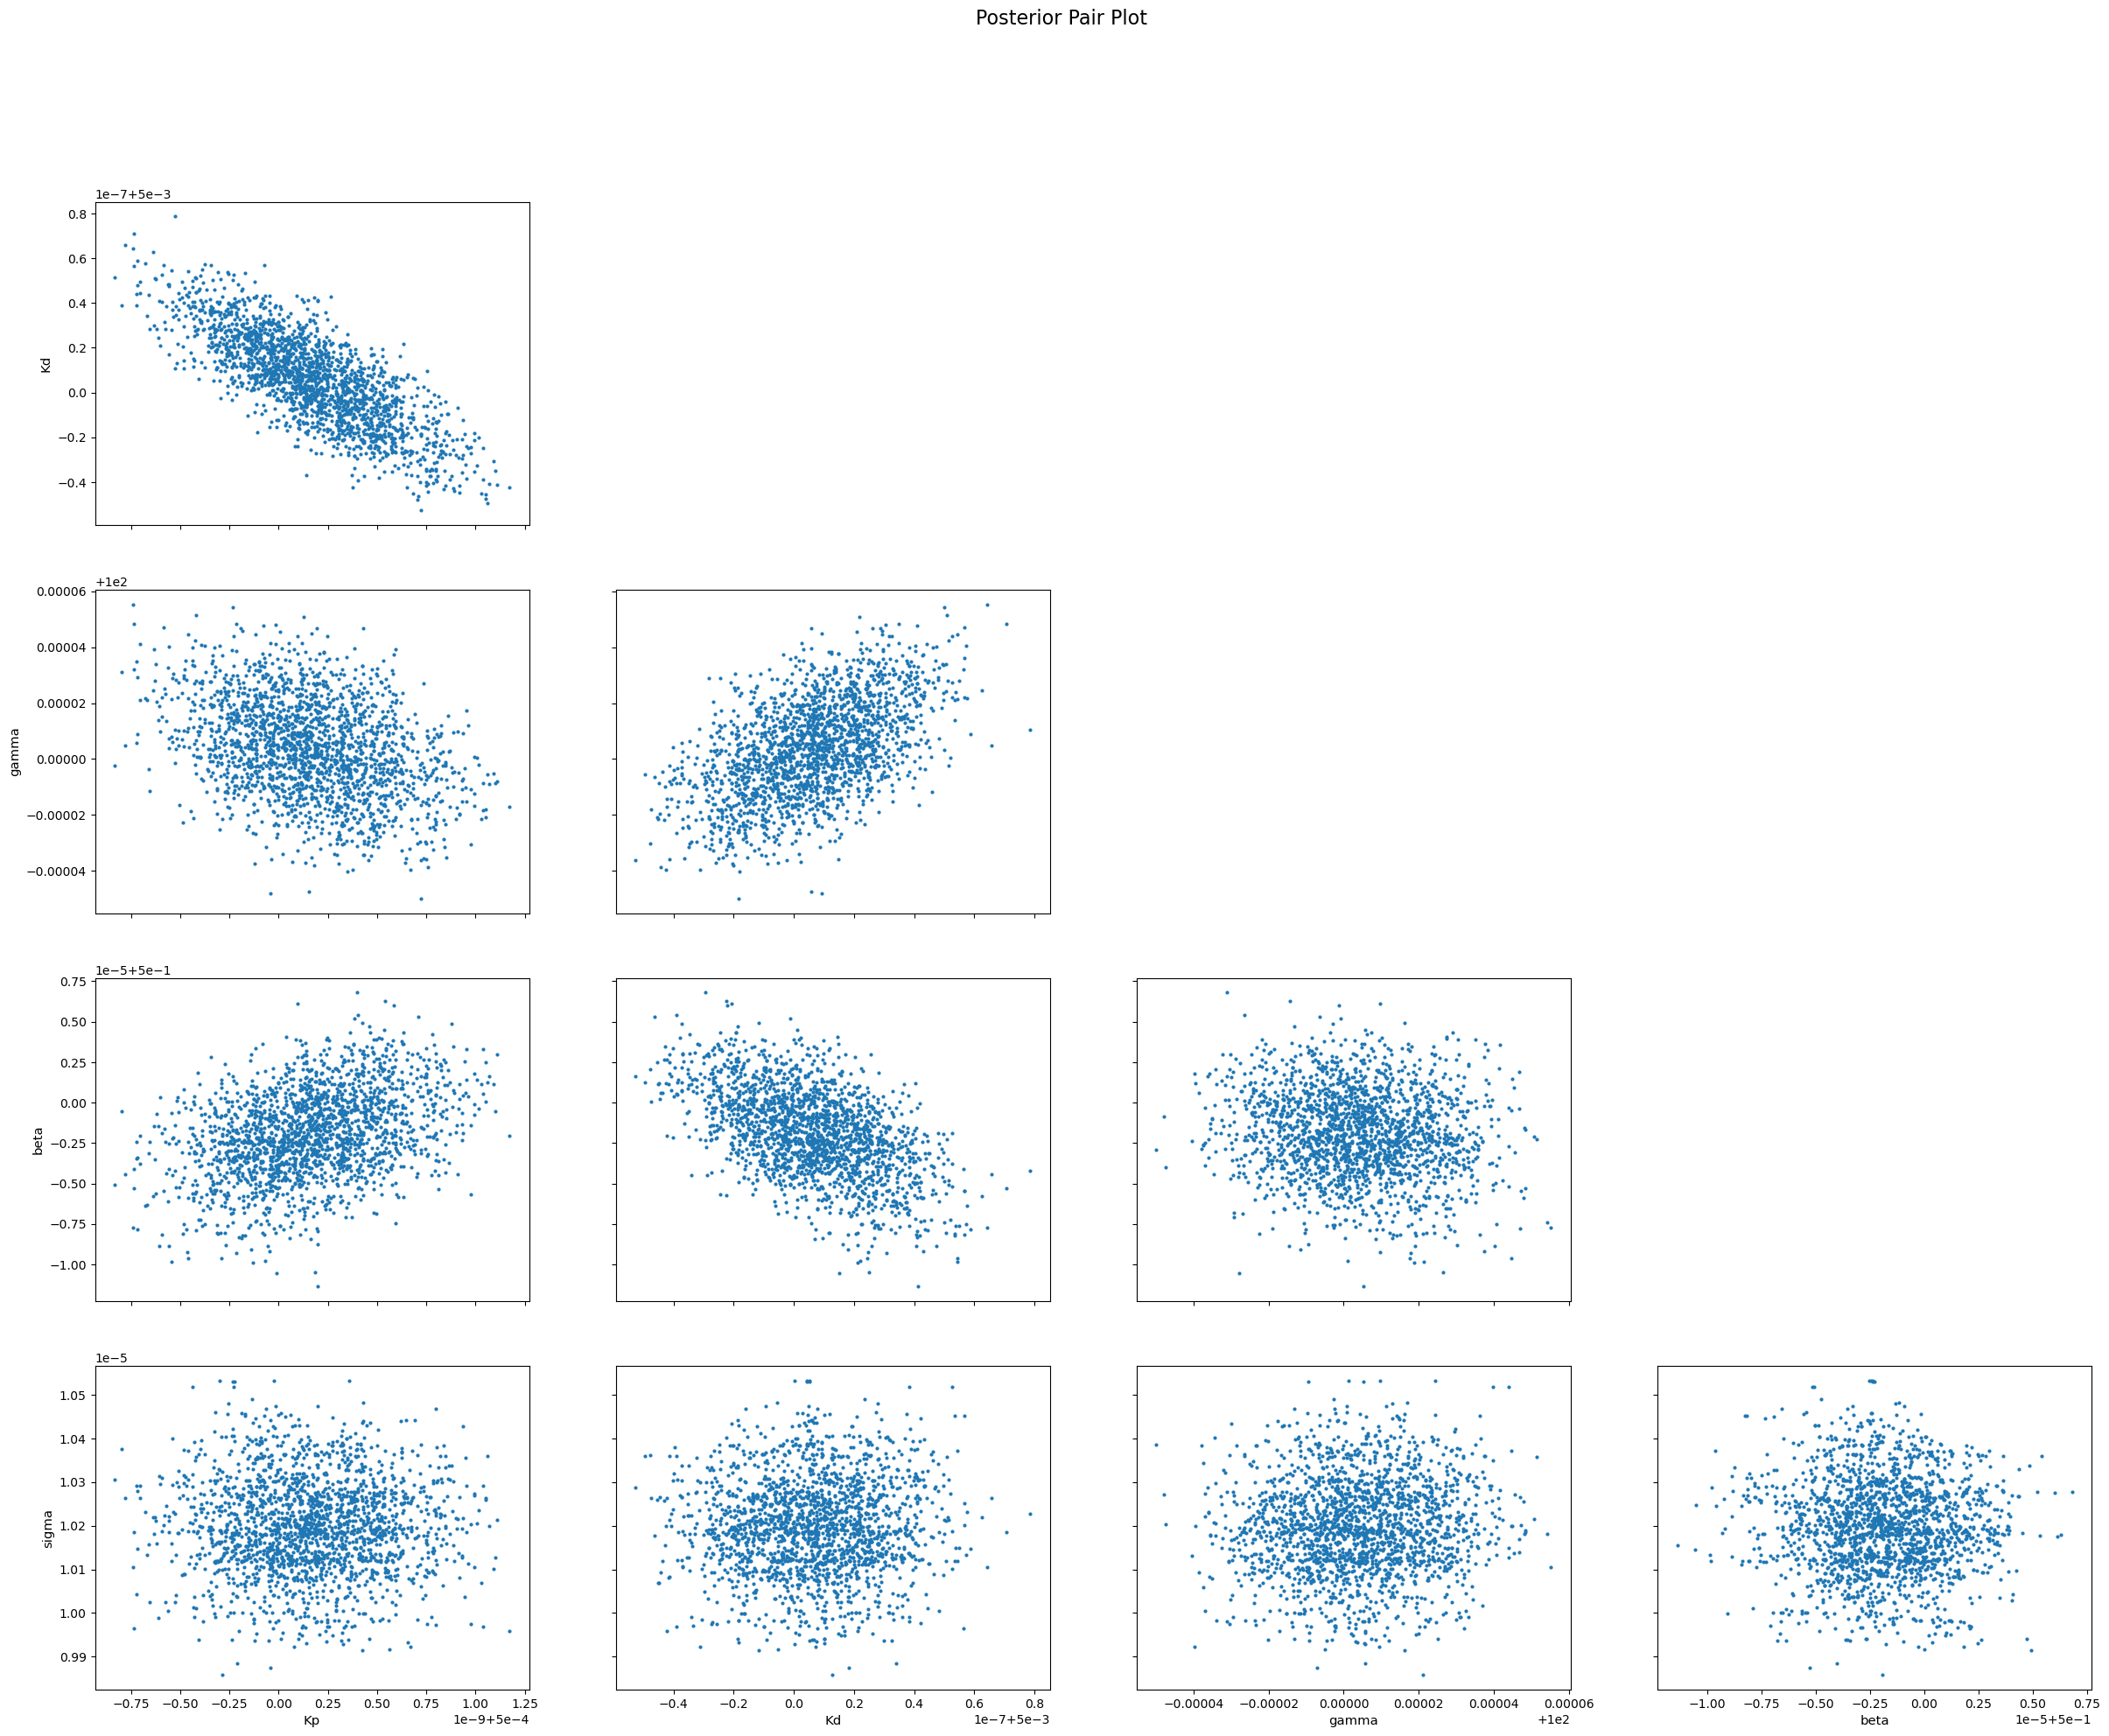

In [10]:
az.plot_pair(
    inf_data,
    var_names=["Kp", "Kd", "gamma", "beta", "sigma"],
    kind="scatter",
    divergences=False,
    textsize=10
)
plt.suptitle("Posterior Pair Plot", fontsize=16)
plt.show()
